# FLIGHT PRICE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Since data is in form of excel file we have to use pandas read_excel to load the data

In [2]:
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.isnull().sum()# We have one null value in Route and Total_stops

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.isnull().sum()#removing the 2 null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [8]:
data.shape #we have 10682 rows and 11 columns

(10682, 11)

## Exploratory Data Analysis(EDA)

##### We can see that the date of journey is of object data type therefore we have to convert it into timestamp for using this column

In [9]:
data['journey_day']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data['journey_month']=pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [10]:
data.head()#added 2 new columns

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
data.drop('Date_of_Journey',axis=1,inplace=True)#dropping the date of journey column

##### Similarly, we can apply date time on Dep_time and Arrival_time

In [12]:
# DEPARTURE TIME
data['dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

data.drop('Dep_Time',axis=1,inplace=True)

# ARRIVAL TIME
data['arr_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['arr_min']=pd.to_datetime(data.Arrival_Time).dt.minute

data.drop('Arrival_Time',axis=1,inplace=True)



In [13]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   journey_day      10682 non-null  int64 
 9   journey_month    10682 non-null  int64 
 10  dep_hour         10682 non-null  int64 
 11  dep_min          10682 non-null  int64 
 12  arr_hour         10682 non-null  int64 
 13  arr_min          10682 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.2+ MB


##### Extracting the hours and minutes from the duration column

###### Note: Here we cannot simply convert duration using timestamp because it is showing out of bounds timestamp error

In [15]:
# Assigning and converting Duration column into list
duration=list(data.Duration)
for i in range(len(duration)):
    if len(duration[i].split())!=2: #checking for those values which contains only hours or mins 
        if('h' in duration[i]): #if it contain hours then appending 0mins to it
            duration[i]=duration[i]+' 0m'
        else: #if it contain mins then appending 0hours to it
            duration[i]='0h '+duration[i]    

In [16]:
duration[:5]#first five values of duration list

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m']

In [17]:
duration_hours=[]
duration_min=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))#extracting hours
    duration_min.append(int(duration[i].split()[1][:-1])) #extracting minutes 

In [18]:
data['duration_hours']=duration_hours
data['duration_min']=duration_min

In [19]:
data.drop('Duration',axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_month    10682 non-null  int64 
 9   dep_hour         10682 non-null  int64 
 10  dep_min          10682 non-null  int64 
 11  arr_hour         10682 non-null  int64 
 12  arr_min          10682 non-null  int64 
 13  duration_hours   10682 non-null  int64 
 14  duration_min     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


## Handling Categorical Data

There are two ways of categorical data:
1. Nominal Data --> Not In Order
2. Ordinal data --> In order

###### Mostly, Nominal data is handled using One Hot encoding(dummy variables) and Ordinal Data is handled using Label encoder

In [21]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


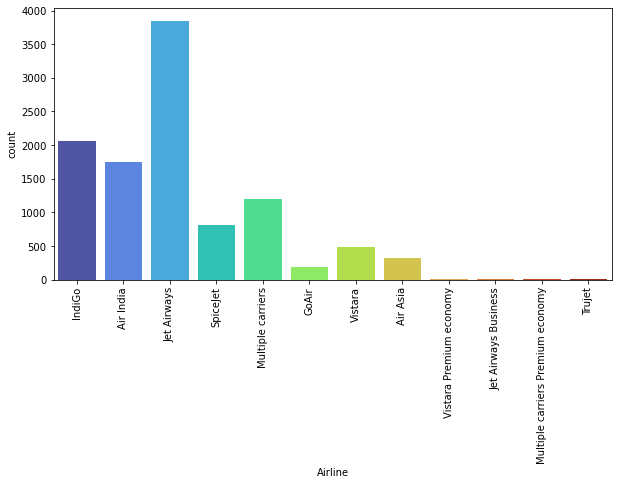

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data['Airline'],data=data,palette='turbo')
plt.xticks(rotation='vertical');

#Here we can see that Jet Airways has the highest Business and every other Airline has more or less same business

In [23]:
#As Airline is Nominal Categorical data we will perform One Hot Encoding
airline=data['Airline']
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

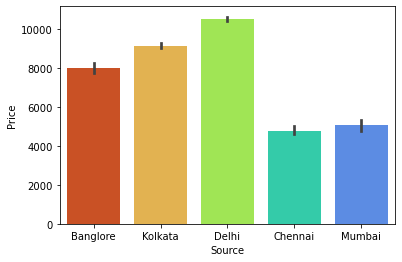

In [25]:
sns.barplot(x=data['Source'],y=data['Price'],data=data,palette='turbo_r');

#Delhi Source has the highest Average Price

In [26]:
#As Source is also a Nominal Categorical data we will perform One Hot Encoding
source=data['Source']
source=pd.get_dummies(source,drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Now same process will be repeated for Destination

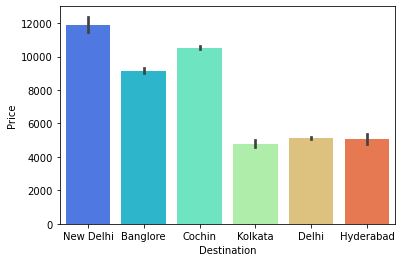

In [27]:
sns.barplot(x=data['Destination'],y=data['Price'],data=data,palette='rainbow');

In [28]:
destination=data['Destination']
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:
# Dropping the Route and Additional Info column
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [30]:
#We have one more categorical feature which is number of stops and it seems to be ordinal data so we have to perform Label encoding
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hours,duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [33]:
# Now concatinating all the dummy variables we have created
data2=pd.concat([data,airline,source,destination],axis=1)

In [34]:
data2.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [35]:
data2.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [36]:
data2.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hours,duration_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [37]:
data2.shape#Data2 is our final training data

(10682, 30)

#### Importing our test data

In [38]:
test_data=pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## We have to preprocess the test data in the same way we preprocessed our training data

In [39]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())


# Date_of_Journey
test_data["journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["arr_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["arr_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)




# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i] + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_min = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))    # Extract hours from duration
    duration_min.append(int(duration[i].split()[1][:-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["duration_hours"] = duration_hours
test_data["duration_min"] = duration_min
test_data.drop(["Duration"], axis = 1, inplace = True)

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, airline, source, destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [40]:
data_test.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hours,duration_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Our final 2 datasets are:-
1. Training data-data2
2. Test Data-data_test

## Our next step would be feature selection
We have to find out that which features are strongly related with our target variable 'PRICE'.

In [41]:
data2.shape

(10682, 30)

In [42]:
data2.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hours', 'duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

We have to store the features in "X" and target variable in 'y' from our data2

In [43]:
y=data2['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [44]:
X=data2.drop('Price',axis=1)
X.head()

,Total_Stops,journey_day,journey_month,dep_hour,dep_min,arr_hour,arr_min,duration_hours,duration_min,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


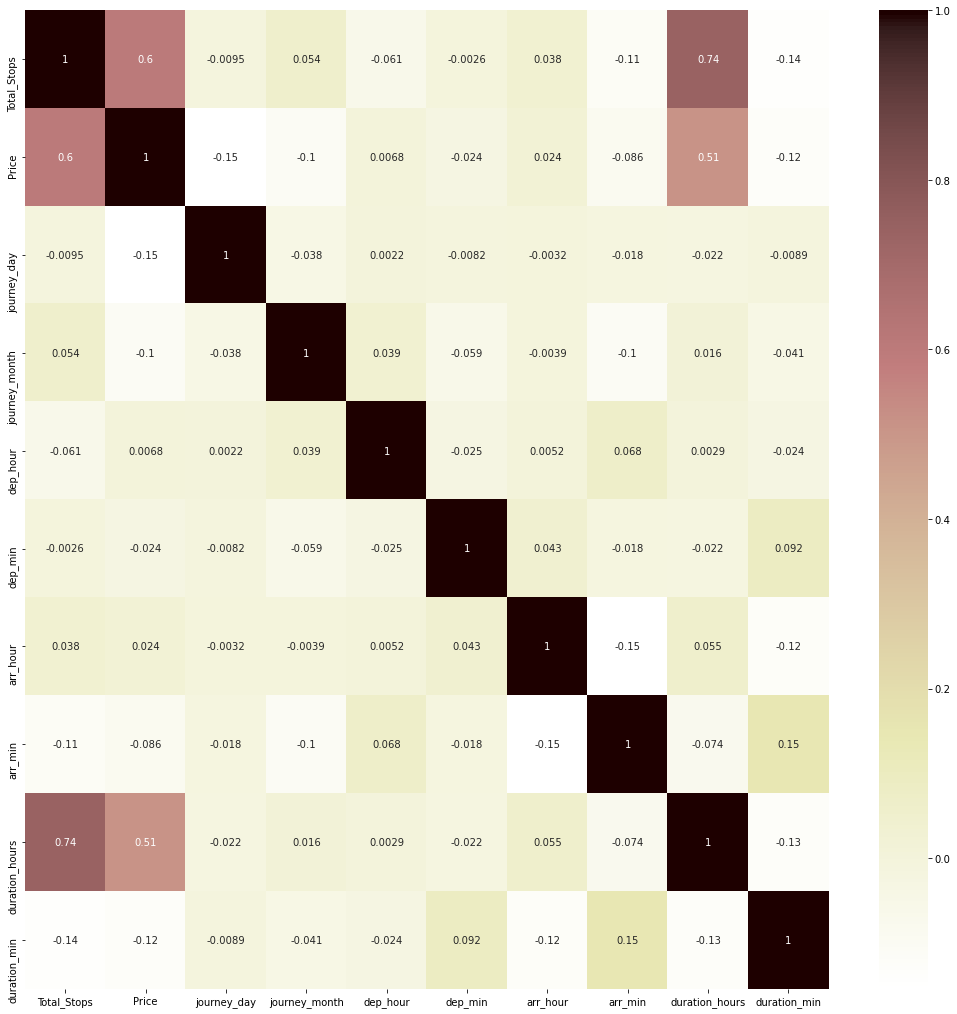

In [45]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "pink_r");

In [46]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
tree_reg= ExtraTreesRegressor()
tree_reg.fit(X, y)

ExtraTreesRegressor()

In [47]:
features=tree_reg.feature_importances_
print(features)

[2.43115430e-01 1.43800257e-01 5.32339544e-02 2.42415534e-02
 2.13495705e-02 2.75599824e-02 1.98428837e-02 1.11716337e-01
 1.72957410e-02 9.14263890e-03 2.33653861e-03 1.90610127e-02
 1.38022183e-01 6.72361655e-02 1.89696524e-02 8.32496188e-04
 3.61699843e-03 1.03810583e-04 4.77703899e-03 8.27530755e-05
 4.25498761e-04 8.68041265e-03 3.25887839e-03 6.14704452e-03
 7.72292888e-03 1.48417441e-02 7.03693262e-03 4.21745739e-04
 2.51278172e-02]


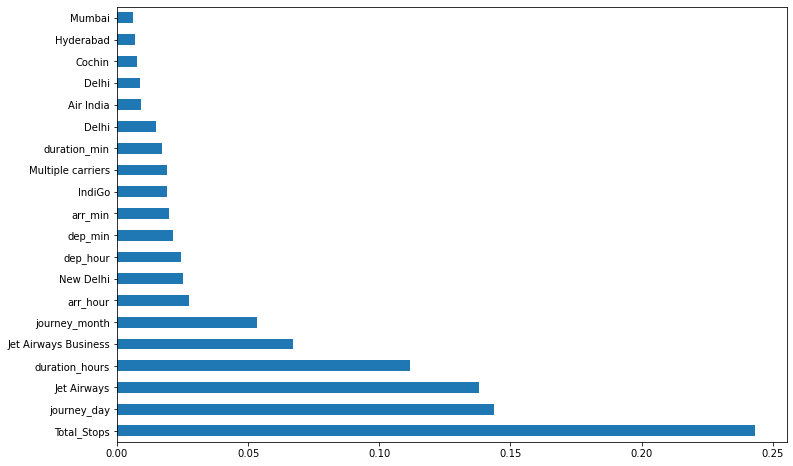

In [48]:
plt.figure(figsize = (12,8))
feat = pd.Series(features, index=X.columns)
feat.nlargest(20).plot(kind='barh')
plt.show()

# Fitting the Model

We will be using random forest for fitting our model.
###### But Why Random Forest??
Because Random Forests can also be used for regression tasks. A Random Forest's nonlinear nature can give it a leg up over linear algorithms, making it a great option.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
y_pred=rf.predict(X_test)

In [52]:
rf.score(X_train,y_train)

0.9532362868833115

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

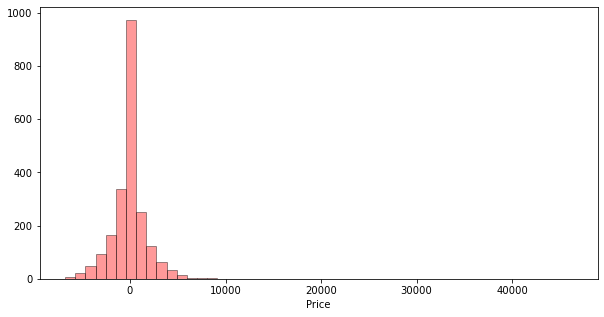

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-y_pred,color='red',kde=False,hist_kws=dict(edgecolor="k"))

In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [55]:
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 1170.689474476662
MSE 4354621.077614093
RMSE 2086.7728859686895


In [56]:
sklearn.metrics.r2_score(y_test, y_pred)

<IPython.core.display.Javascript object>

0.7980424031851527

## Hyperparameter Tuning

* Choose following method for hyperparameter tuning
    1. Randomized Search CV
    2. GridSearchCV
* Assign hyperparameters in form of dictionary
* Fit the model
* Check the best parameters and best score.

#### Randomized Search CV

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
#Chosing Different parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [59]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [60]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [61]:
randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=  16.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=  16.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=  14.9s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=  15.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=30, total=  20.8s
[CV] n_estimators=1300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1300, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  10.1s
[CV] n_estimators=1300, min_samples_split

[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.6s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.0s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.2s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.5s
[CV] n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   6.2s
[CV] n_estimators=200, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [62]:
randomcv.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [63]:
pred=randomcv.predict(X_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


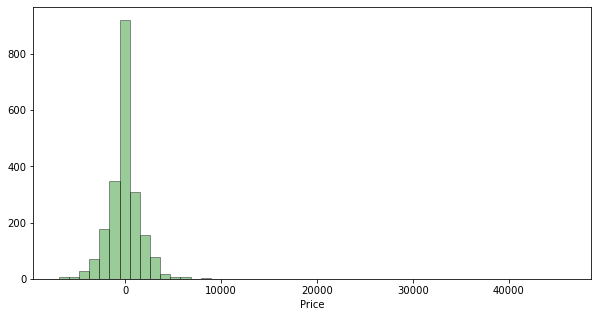

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(y_test-pred,kde=False,color='green',hist_kws=dict(edgecolor="k"));

In [65]:
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

MAE: 1137.2759554602776
MSE: 3949302.858176084
RMSE: 1987.2852986363291


## Saving the Model

In [70]:
import pickle

file=open('rf_flight.pkl','wb')

pickle.dump(rf,file)

In [71]:
model = open('rf_flight.pkl','rb')
forest = pickle.load(model)

In [72]:
y_predred=forest.predict(X_test)

In [73]:
sklearn.metrics.r2_score(y_test,y_pred)

<IPython.core.display.Javascript object>

0.7980424031851527